<a href="https://colab.research.google.com/github/evanz1226/COEN2610/blob/main/FeatureExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
from google.colab import drive

%cd /content/drive/MyDrive/DataForClass

!ls
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
plt.style.use('seaborn')
import numpy as np
import sys
import os
import pandas as pd
import copy
import scipy.io

from sklearn.model_selection import train_test_split



from load_etching_raw import read_mat_data
INFORMATION, calibration, calib_names, test_names, test, fault_names, variables = read_mat_data()


/content/drive/MyDrive/DataForClass
data  etching_features.mat  load_etching_raw.py  __pycache__


Extract Static features from calibration samples

In [100]:

#Feature extraction for healthy data
experiments = []
calibration_features = []
for i in range(len(calibration)):
    data = copy.copy(calibration[i])
    n_row = np.size(data,0)
    
    if n_row >= 90:
        
        name = copy.copy(calib_names[i])
        experiment = int(name[1:3])
        experiments.append(experiment)
        
        timestamp = data[:,0]
        time_index = np.argsort(timestamp)
        data_sorted = data[time_index,:] #sort data
        
        #Split Data
        steps = data[:,1]
        index_step_4 = np.where(steps == 4)[0]
        data_step_4 = data[index_step_4,:]
        index_step_5 = np.where(steps == 5)[0]
        data_step_5 = data[index_step_5,:]
        
        #Get Sensor Data
        data_step_4_sensors = data_step_4[:,2:]
        data_step_5_sensors = data_step_5[:,2:]

         #Extract statisitc features
        n_columns = np.size(data_step_5_sensors,1)
        feature_step_4 = []
        for i_column in range(n_columns): #loop through all sensors
            one_column = copy.copy(data_step_5_sensors[:,i_column])
            one_column_feature = np.array([np.mean(one_column), np.var(one_column),\
                                          np.max(one_column), np.min(one_column),\
                                          np.max(one_column)- np.min(one_column)])
            feature_step_4.extend(one_column_feature)
        feature_step_4 = np.array([feature_step_4])

        #Extract statisitc features
        n_columns = np.size(data_step_5_sensors,1)
        feature_step_5 = []
        for i_column in range(n_columns): #loop through all sensors
            one_column = copy.copy(data_step_5_sensors[:,i_column])
            one_column_feature = np.array([np.mean(one_column), np.var(one_column),\
                                          np.max(one_column), np.min(one_column),\
                                          np.max(one_column)- np.min(one_column)])
            feature_step_5.extend(one_column_feature)
        feature_step_5 = np.array([feature_step_5])
        
        #combine feature from step 4 and 5
        feature = np.column_stack((feature_step_4,feature_step_5))
        feature = np.squeeze(feature)
        
        #output
        
        calibration_features.append(feature)
calibration_features = np.array(calibration_features)
    
#visualize features matrix
df_calibration_features = pd.DataFrame(calibration_features)
df_calibration_features


,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,189
0,751.745763,0.223499,752.0,750.0,2.0,753.186441,0.626257,755.0,751.0,4.0,...,27720.101695,63468.396438,28014.0,27080.0,934.0,49.915254,0.077564,50.0,49.0,1.0
1,751.750000,0.223214,752.0,750.0,2.0,753.160714,0.527742,755.0,752.0,3.0,...,27720.928571,78561.994898,28028.0,27118.0,910.0,49.892857,0.095663,50.0,49.0,1.0
2,751.732143,0.231824,753.0,751.0,2.0,753.125000,0.466518,754.0,752.0,2.0,...,27722.571429,86607.530612,28034.0,27044.0,990.0,49.875000,0.109375,50.0,49.0,1.0
3,751.781818,0.170579,752.0,751.0,1.0,753.254545,0.335207,754.0,752.0,2.0,...,27717.600000,72601.949091,27996.0,26986.0,1010.0,49.872727,0.111074,50.0,49.0,1.0
4,751.800000,0.196364,753.0,751.0,2.0,753.090909,0.555372,754.0,751.0,3.0,...,27741.890909,77496.060826,28034.0,27094.0,940.0,49.909091,0.082645,50.0,49.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,751.693878,0.212411,752.0,751.0,1.0,753.163265,0.748855,756.0,752.0,4.0,...,28111.836735,97561.442732,28466.0,27294.0,1172.0,50.795918,0.203249,51.0,49.0,2.0
103,751.849057,0.165895,753.0,751.0,2.0,753.301887,0.437166,755.0,752.0,3.0,...,28128.188679,93186.153079,28444.0,27336.0,1108.0,50.735849,0.232111,51.0,49.0,2.0
104,751.846154,0.168639,753.0,751.0,2.0,753.307692,0.636095,756.0,752.0,4.0,...,28149.769231,103302.254438,28452.0,27342.0,1110.0,50.634615,0.308802,51.0,49.0,2.0
105,751.836735,0.177426,753.0,751.0,2.0,753.285714,0.326531,754.0,752.0,2.0,...,28126.000000,106005.714286,28484.0,27360.0,1124.0,50.653061,0.267389,51.0,49.0,2.0


Extract static features from test samples

In [101]:
#Feature extraction for faulty data
test_features = []
for i in range(len(test)):
    data = copy.copy(test[i])
    n_row = np.size(data,0)
    
    if n_row >= 90:
        
        #add experiment ID
        name = copy.copy(test_names[i])
        experiment = int(name[1:3])
        experiments.append(experiment)
        
        #Sort according to timestamp
        timestamp = data[:,0]
        time_index = np.argsort(timestamp)
        data_sorted = data[time_index,:] #sort data
        
        #Split Data
        steps = data[:,1]
        index_step_4 = np.where(steps == 4)[0]
        data_step_4 = data[index_step_4,:]
        index_step_5 = np.where(steps == 5)[0]
        data_step_5 = data[index_step_5,:]
        
        #Get Sensor Data
        data_step_4_sensors = data_step_4[:,2:]
        data_step_5_sensors = data_step_5[:,2:]

         #Extract statisitc features
        n_columns = np.size(data_step_5_sensors,1)
        feature_step_4 = []
        for i_column in range(n_columns): #loop through all sensors
            one_column = copy.copy(data_step_5_sensors[:,i_column])
            one_column_feature = np.array([np.mean(one_column), np.var(one_column),\
                                          np.max(one_column), np.min(one_column),\
                                          np.max(one_column)- np.min(one_column)])
            feature_step_4.extend(one_column_feature)
        feature_step_4 = np.array([feature_step_4])

        #Extract statisitc features
        n_columns = np.size(data_step_5_sensors,1)
        feature_step_5 = []
        for i_column in range(n_columns): #loop through all sensors
            one_column = copy.copy(data_step_5_sensors[:,i_column])
            one_column_feature = np.array([np.mean(one_column), np.var(one_column),\
                                          np.max(one_column), np.min(one_column),\
                                          np.max(one_column)- np.min(one_column)])
            feature_step_5.extend(one_column_feature)
        feature_step_5 = np.array([feature_step_5])
        
        #combine feature from step 4 and 5
        feature = np.column_stack((feature_step_4,feature_step_5))
        feature = np.squeeze(feature)
        
        #output
        
        test_features.append(feature)
test_features = np.array(test_features)
    
#visualize features matrix
df_test_features = pd.DataFrame(test_features)
df_test_features

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,189
0,751.703704,0.208505,752.000000,751.000000,1.0,753.259259,0.414266,755.000000,752.000000,3.0,...,27966.518519,58409.360768,28232.0,27354.0,878.0,49.870370,0.112826,50.0,49.0,1.0
1,751.732143,0.231824,753.000000,751.000000,2.0,753.267857,0.588967,755.000000,751.000000,4.0,...,27697.714286,75687.061224,28042.0,27068.0,974.0,49.642857,0.229592,50.0,49.0,1.0
2,751.759259,0.182785,752.000000,751.000000,1.0,753.259259,0.340192,754.000000,752.000000,2.0,...,27799.814815,83438.558299,28062.0,27112.0,950.0,49.962963,0.035665,50.0,49.0,1.0
3,751.877551,0.148272,753.000000,751.000000,2.0,753.489796,0.535610,756.000000,752.000000,4.0,...,27975.183673,68799.660142,28304.0,27422.0,882.0,45.734694,0.439817,48.0,45.0,3.0
4,751.769231,0.177515,752.000000,751.000000,1.0,753.038462,0.498521,754.000000,752.000000,2.0,...,27819.000000,85674.076923,28084.0,27066.0,1018.0,49.692308,0.213018,50.0,49.0,1.0
5,751.791324,0.252743,753.106139,751.106139,2.0,753.388889,0.533951,755.000000,752.000000,3.0,...,27747.740741,74635.117970,28030.0,27160.0,870.0,50.166667,0.175926,51.0,49.0,2.0
6,751.892857,0.095663,752.000000,751.000000,1.0,753.214286,0.668367,755.000000,751.000000,4.0,...,27648.785714,89658.382653,28012.0,26950.0,1062.0,54.839286,0.742028,56.0,49.0,7.0
7,751.781818,0.170579,752.000000,751.000000,1.0,753.285534,0.596364,755.085534,752.085534,3.0,...,27718.145455,85118.378843,28020.0,27078.0,942.0,48.909091,0.082645,49.0,48.0,1.0
8,751.792453,0.164471,752.000000,751.000000,1.0,753.207547,0.579566,755.000000,752.000000,3.0,...,27779.622642,94014.800997,28068.0,27038.0,1030.0,49.886792,0.100392,50.0,49.0,1.0
9,751.924528,0.107512,753.000000,751.000000,2.0,753.150943,0.543254,755.000000,752.000000,3.0,...,27895.433962,78897.264507,28156.0,27204.0,952.0,50.660377,0.262015,51.0,49.0,2.0


5. Combined and Save extracted features

In [102]:
#set health labels
calibration_health_labels = np.zeros((np.size(calibration_features,0),))
test_health_labels = np.ones((np.size(test_features,0),))

#Combine and transform the data
features = np.row_stack((calibration_features,test_features))
labels = np.concatenate([calibration_health_labels,test_health_labels])
experiments = np.array(experiments)

#save as extratced matlab file
scipy.io.savemat(os.path.join(os.path.abspath('.'), 'etching_features.mat'
                      ),{"features":features, "labels":labels,"experiments":experiments})

6. Plot extracted feature
6.1.1 Split

In [103]:
# combine the features, experiments and labels
df_labels_experiments = pd.DataFrame(list(zip(labels,experiments)), columns=['label', 'experiment'])
df_features = pd.DataFrame(features)
df_data = pd.concat([df_labels_experiments,df_features],axis =1)

#split train and test data
X_train, X_test , X_train_labels , X_test_labels = train_test_split(df_data.iloc[:,2:],
                                                                    df_data.iloc[:,0],
                                                                    test_size=0.25,
                                                                    random_state=42)
#visualize dataset
X_train

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,189
24,751.792453,0.164471,752.0,751.0,1.0,753.301887,0.588110,755.0,752.0,3.0,...,27716.188679,78528.190815,28022.0,27074.0,948.0,49.830189,0.140975,50.0,49.0,1.0
93,751.840000,0.174400,753.0,751.0,2.0,753.280000,0.441600,755.0,752.0,3.0,...,28128.880000,106728.985600,28488.0,27338.0,1150.0,50.640000,0.270400,51.0,49.0,2.0
110,751.877551,0.148272,753.0,751.0,2.0,753.489796,0.535610,756.0,752.0,4.0,...,27975.183673,68799.660142,28304.0,27422.0,882.0,45.734694,0.439817,48.0,45.0,3.0
91,751.775510,0.174094,752.0,751.0,1.0,753.367347,0.518117,755.0,752.0,3.0,...,28118.040816,104680.733028,28482.0,27356.0,1126.0,50.693878,0.294044,51.0,49.0,2.0
15,751.740741,0.192044,752.0,751.0,1.0,753.296296,0.689986,755.0,752.0,3.0,...,27736.444444,74968.395062,28050.0,27082.0,968.0,49.851852,0.126200,50.0,49.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,751.826923,0.143121,752.0,751.0,1.0,753.365385,0.385725,755.0,752.0,3.0,...,28150.961538,103233.767751,28474.0,27384.0,1090.0,50.692308,0.289941,51.0,49.0,2.0
14,751.814815,0.150892,752.0,751.0,1.0,753.296296,0.504801,755.0,752.0,3.0,...,27786.962963,83581.146776,28046.0,27132.0,914.0,49.888889,0.098765,50.0,49.0,1.0
92,751.860000,0.120400,752.0,751.0,1.0,753.520000,0.369600,755.0,752.0,3.0,...,28122.520000,112955.009600,28504.0,27336.0,1168.0,50.640000,0.310400,51.0,49.0,2.0
51,751.811321,0.190815,753.0,751.0,2.0,753.264151,0.458526,755.0,752.0,3.0,...,27686.528302,83474.588822,28006.0,26938.0,1068.0,50.660377,0.262015,51.0,49.0,2.0


Find training indices in first experiment


In [104]:
indices_of_experiment_1 = np.squeeze(np.where(experiments == 29))


#determine x_train indices in experiment
indices_of_experiment_1_X_train = []
for index_exp in indices_of_experiment_1:
  true_index = np.where(X_train.index.to_numpy() == index_exp,True,False)
  if np.any(true_index)== True:
    index_value = int(np.where(true_index)[0])
    indices_of_experiment_1_X_train.append(index_value)

#Sort
indices_of_experiment_1_X_train.sort()
print('Experiment 1 indices = ', indices_of_experiment_1_X_train)


Experiment 1 indices =  [0, 2, 4, 6, 10, 13, 14, 16, 18, 22, 28, 32, 36, 37, 38, 40, 41, 44, 45, 47, 63, 66, 72, 73, 74, 76, 77, 78, 82, 87, 91]


Finding training indices in second experiment

In [105]:
indices_of_experiment_2 = np.squeeze(np.where(experiments == 31))

#determine x_train indices in experiment
indices_of_experiment_2_X_train = []
for index_exp in indices_of_experiment_2:
  true_index = np.where(X_train.index.to_numpy() == index_exp,True,False)
  if np.any(true_index)== True:
    index_value = int(np.where(true_index)[0])
    indices_of_experiment_2_X_train.append(index_value)

#Sort
indices_of_experiment_2_X_train.sort()
print('Experiment 2 indices = ', indices_of_experiment_2_X_train)

Experiment 2 indices =  [7, 8, 12, 15, 19, 21, 23, 25, 26, 27, 30, 33, 35, 42, 46, 49, 50, 52, 53, 54, 58, 59, 61, 64, 67, 68, 69, 71, 75, 88, 93]


Finding training indices in third expiriment

In [106]:
indices_of_experiment_3 = np.squeeze(np.where(experiments == 33))

#determine x_train indices in experiment
indices_of_experiment_3_X_train = []
for index_exp in indices_of_experiment_3:
  true_index = np.where(X_train.index.to_numpy() == index_exp,True,False)
  if np.any(true_index)== True:
    index_value = int(np.where(true_index)[0])
    indices_of_experiment_3_X_train.append(index_value)

#Sort
indices_of_experiment_3_X_train.sort()
print('Experiment 3 indices = ', indices_of_experiment_3_X_train)

Experiment 3 indices =  [1, 3, 5, 9, 11, 17, 20, 24, 29, 31, 34, 39, 43, 48, 51, 55, 56, 57, 60, 62, 65, 70, 79, 80, 81, 83, 84, 85, 86, 89, 90, 92, 94]


Plot Experiment 1

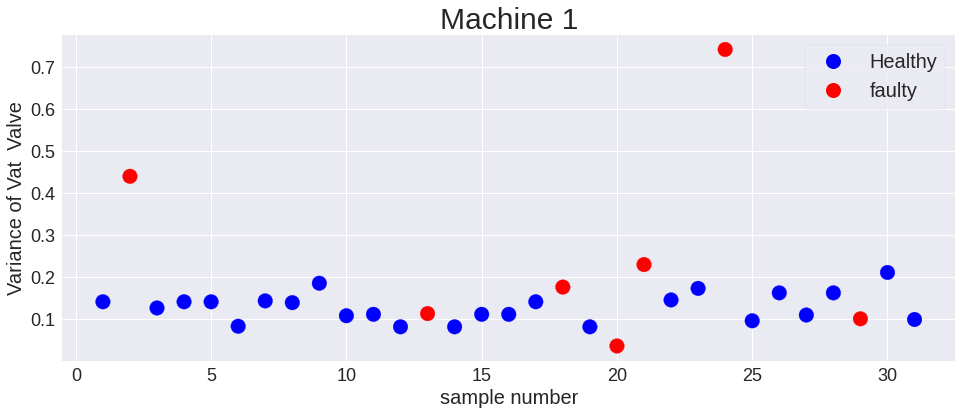

In [107]:
#set initial parameters
plt.rcParams["legend.frameon"]=True
plt.rcParams['figure.figsize'] = [16,6]

#Set colors
colors = ['r' if X_train_labels.iloc[index_value]==1 else 'b' for
          index_value in indices_of_experiment_1_X_train]
#plot samples
samples_experiment_1 = np.arange(1,len(indices_of_experiment_1_X_train)+1)
plt.scatter(samples_experiment_1,
            X_train.iloc[indices_of_experiment_1_X_train,91],
            c= colors,
            s =215,
            label= 'Normal')

#set tick parameters
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.xlabel("sample number", fontsize =20)
plt.ylabel("Variance of Vat  Valve", fontsize =20)
plt.title("Machine 1", fontsize=30)

colors = ["b","r"]
labels = ['Healthy','faulty']
makers = [mlines.Line2D([],[],
                         ls = 'none',
                         marker='o',
                         label = labels[i],
                         markerfacecolor = colors[i],
                          markersize=15) for i in range(len(labels))]
plt.legend(handles=makers, fontsize =20)

plt.show()

Plot experiment 2

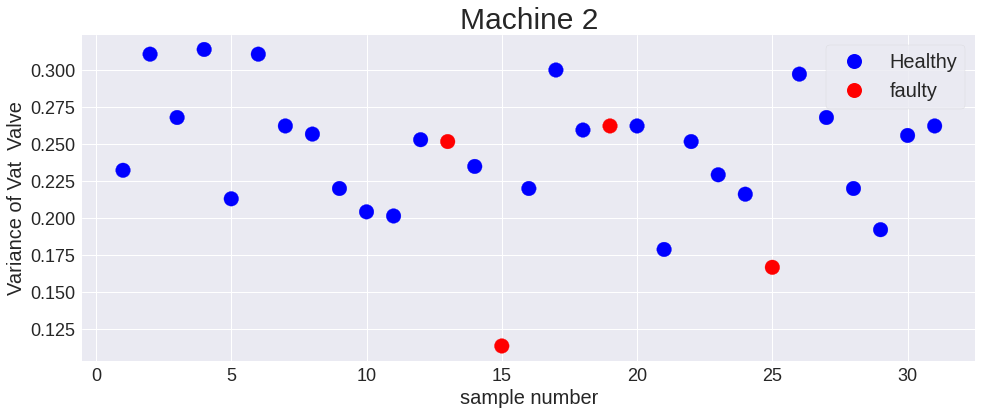

In [108]:
#set initial parameters
plt.rcParams["legend.frameon"]=True
plt.rcParams['figure.figsize'] = [16,6]

#Set colors
colors = ['r' if X_train_labels.iloc[index_value]==1 else 'b' for
          index_value in indices_of_experiment_2_X_train]
#plot samples
samples_experiment_2 = np.arange(1,len(indices_of_experiment_2_X_train)+1)
plt.scatter(samples_experiment_2,
            X_train.iloc[indices_of_experiment_2_X_train,91],
            c= colors,
            s =215,)

#set tick parameters
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.xlabel("sample number", fontsize =20)
plt.ylabel("Variance of Vat  Valve", fontsize =20)
plt.title("Machine 2", fontsize=30)

colors = ["b","r"]
labels = ['Healthy','faulty']
makers = [mlines.Line2D([],[],
                         ls = 'none',
                         marker='o',
                         label = labels[i],
                         markerfacecolor = colors[i],
                          markersize=15) for i in range(len(labels))]
plt.legend(handles=makers, fontsize =20)

plt.show()

Plot experiment 3

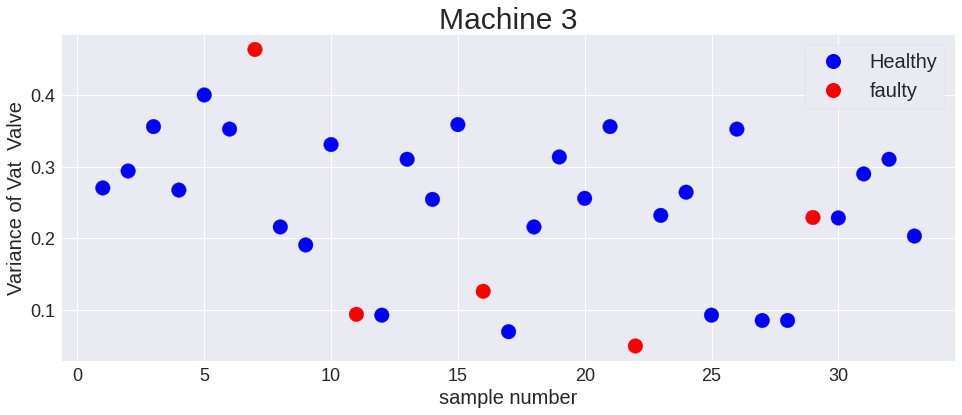

In [109]:
#set initial parameters
plt.rcParams["legend.frameon"]=True
plt.rcParams['figure.figsize'] = [16,6]

#Set colors
colors = ['r' if X_train_labels.iloc[index_value]==1 else 'b' for
          index_value in indices_of_experiment_3_X_train]
#plot samples
samples_experiment_3 = np.arange(1,len(indices_of_experiment_3_X_train)+1)
plt.scatter(samples_experiment_3,
            X_train.iloc[indices_of_experiment_3_X_train,91],
            c= colors,
            s =215,
            label= 'Normal')

#set tick parameters
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.xlabel("sample number", fontsize =20)
plt.ylabel("Variance of Vat  Valve", fontsize =20)
plt.title("Machine 3", fontsize=30)

colors = ["b","r"]
labels = ['Healthy','faulty']
makers = [mlines.Line2D([],[],
                         ls = 'none',
                         marker='o',
                         label = labels[i],
                         markerfacecolor = colors[i],
                          markersize=15) for i in range(len(labels))]
plt.legend(handles=makers, fontsize =20)

plt.show()